# Car Price Prediction

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal ::

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reading and Understanding the Data

1.Importing data using the pandas library

2.Understanding the structure of the data


In [2]:
Cars = pd.read_csv('C:\DATA file\Car data project\CarPrice_Assignment.csv')
Cars.head(10)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   
5        sedan        fwd          front       99.8  ...         136   
6        sedan        fwd          front      105.8  ...         136   
7        wagon        fwd          front      105.8  ...         136   
8        sedan        fwd          front      105.8  ...         131   
9    hatchback        4wd          front       99.5  ...         131   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   
5        mpfi       3.19    3.40              8.5        110     5500      19   
6        mpfi       3.19    3.40              8.5        110     5500      19   
7        mpfi       3.19    3.40              8.5        110     5500      19   
8        mpfi       3.13    3.40              8.3        140     5500      17   
9        mpfi       3.13    3.40              7.0        160     5500      16   

   highwaympg      price  
0          27  13495.000  
1          27  16500.000  
2          26  16500.000  
3          30  13950.000  
4          22  17450.000  
5          25  15250.000  
6          25  17710.000  
7          25  18920.000  
8          20  23875.000  
9          22  17859.167  

[10 rows x 26 columns]

In [3]:
Cars.shape

(205, 26)

In [4]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
Cars.describe().T

count          mean          std      min      25%  \
car_ID            205.0    103.000000    59.322565     1.00    52.00   
symboling         205.0      0.834146     1.245307    -2.00     0.00   
wheelbase         205.0     98.756585     6.021776    86.60    94.50   
carlength         205.0    174.049268    12.337289   141.10   166.30   
carwidth          205.0     65.907805     2.145204    60.30    64.10   
carheight         205.0     53.724878     2.443522    47.80    52.00   
curbweight        205.0   2555.565854   520.680204  1488.00  2145.00   
enginesize        205.0    126.907317    41.642693    61.00    97.00   
boreratio         205.0      3.329756     0.270844     2.54     3.15   
stroke            205.0      3.255415     0.313597     2.07     3.11   
compressionratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower        205.0    104.117073    39.544167    48.00    70.00   
peakrpm           205.0   5125.121951   476.985643  4150.00  4800.00   
citympg           205.0     25.219512     6.542142    13.00    19.00   
highwaympg        205.0     30.751220     6.886443    16.00    25.00   
price             205.0  13276.710571  7988.852332  5118.00  7788.00   

                       50%       75%       max  
car_ID              103.00    154.00    205.00  
symboling             1.00      2.00      3.00  
wheelbase            97.00    102.40    120.90  
carlength           173.20    183.10    208.10  
carwidth             65.50     66.90     72.30  
carheight            54.10     55.50     59.80  
curbweight         2414.00   2935.00   4066.00  
enginesize          120.00    141.00    326.00  
boreratio             3.31      3.58      3.94  
stroke                3.29      3.41      4.17  
compressionratio      9.00      9.40     23.00  
horsepower           95.00    116.00    288.00  
peakrpm            5200.00   5500.00   6600.00  
citympg              24.00     30.00     49.00  
highwaympg           30.00     34.00     54.00  
price             10295.00  16503.00  45400.00

# Step 2 : Data Cleaning and Preparation

In [6]:
#Splitting company name from CarName column
CompanyName =Cars['CarName'].apply(lambda x : x.split(' ')[0])
Cars.insert(3,"CompanyName",CompanyName)
Cars.drop(['CarName'],axis=1,inplace=True)


In [7]:
Cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [8]:
Cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
Cars.CompanyName.nunique()

28

In [10]:
Cars.CompanyName=Cars.CompanyName.str.lower()

def replace_name(a,b):
    Cars.CompanyName.replace(a,b,inplace=True)
    
    

In [11]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')


In [12]:
Cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
Cars.duplicated().sum()


0

In [14]:
Cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Step 3: Visualizing the data

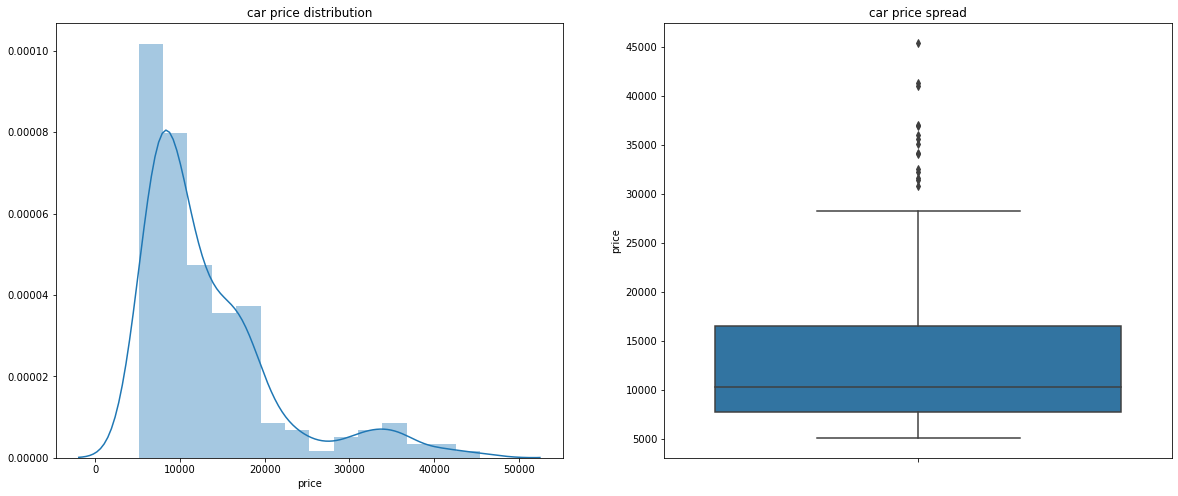

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('car price distribution')
sns.distplot(Cars.price)

plt.subplot(1,2,2)
plt.title('car price spread')
sns.boxplot(y=Cars.price)

In [16]:
print(Cars.price.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Inference :


1.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

2.There is a significant difference between the mean and the median of the price distribution.

3.The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

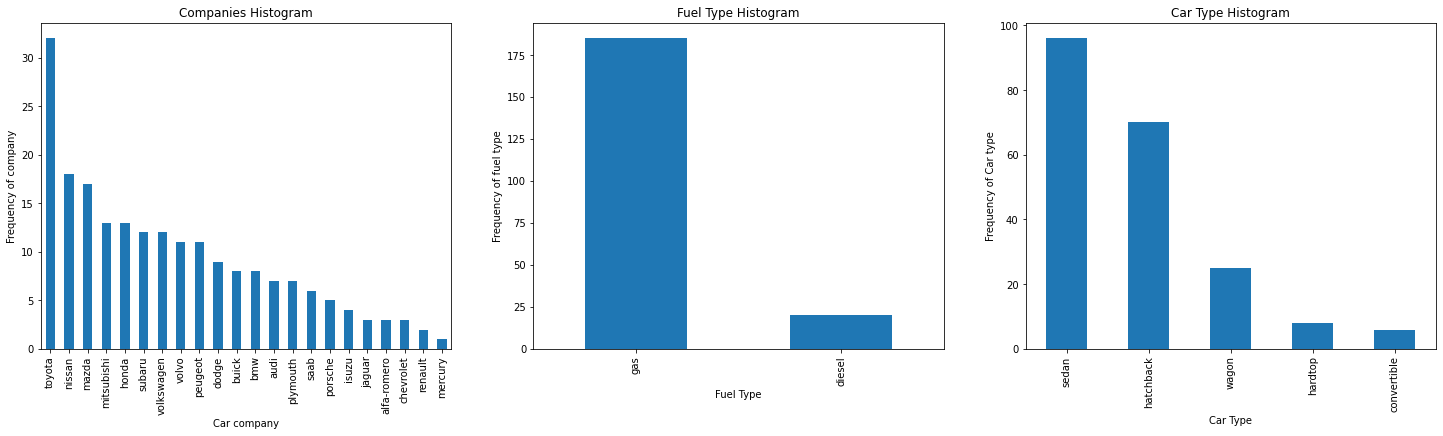

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = Cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')


plt.subplot(1,3,2)
plt1 = Cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = Cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Inference :

1.Toyota seemed to be favored car company.

2.Number of gas fueled cars are more than diesel.

3.sedan is the top car type prefered.

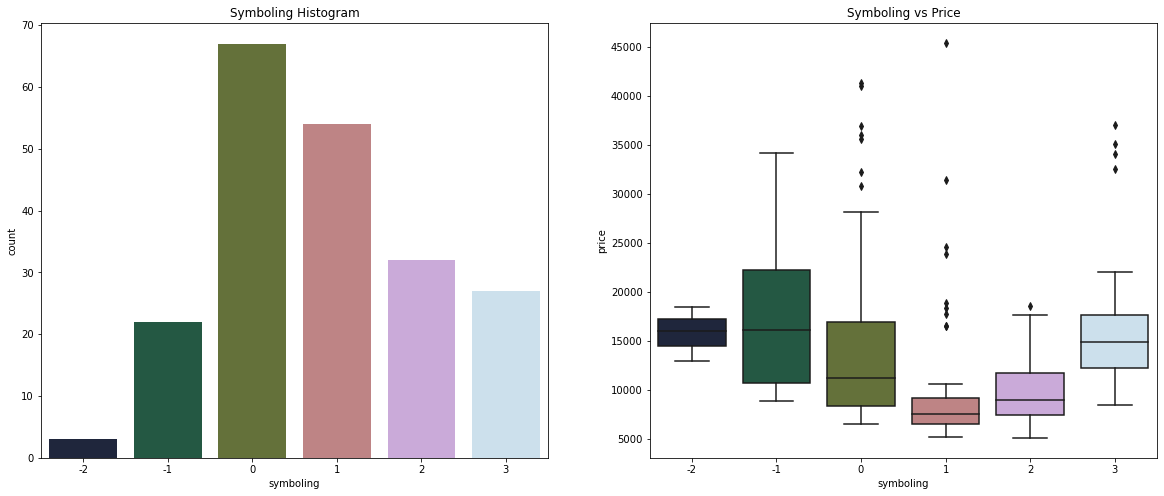

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(Cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=Cars.symboling, y=Cars.price, palette=("cubehelix"))

plt.show()



1.It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

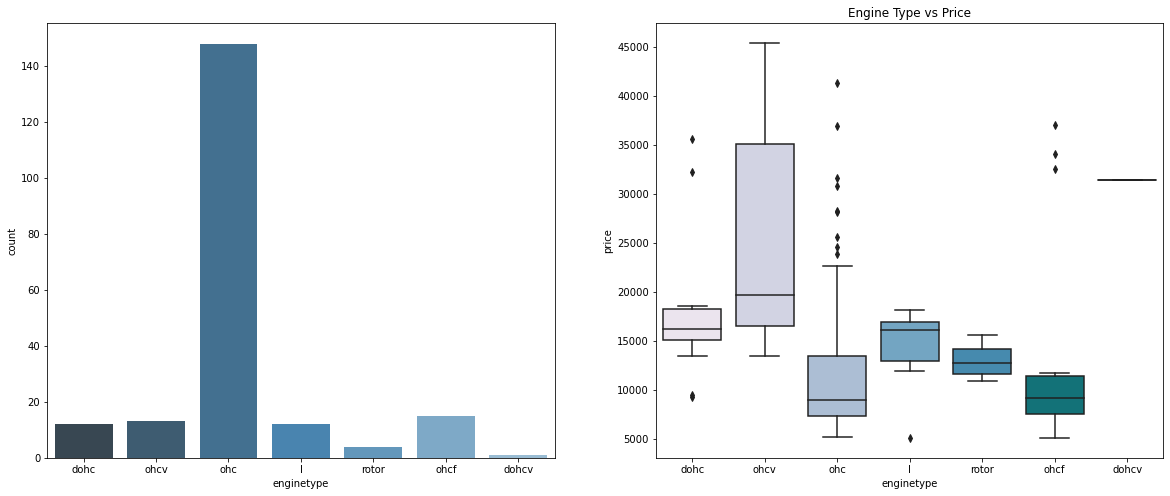

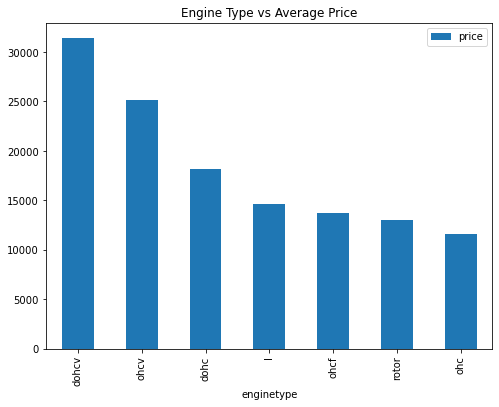

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(Cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=Cars.enginetype, y=Cars.price, palette=("PuBuGn"))

df = pd.DataFrame(Cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


1.ohc Engine type seems to be most favored type.

2.ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

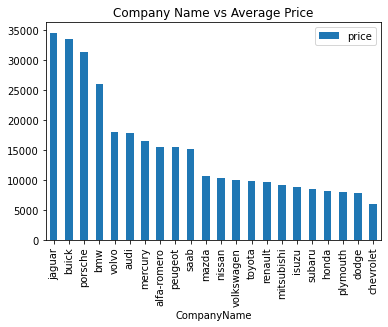

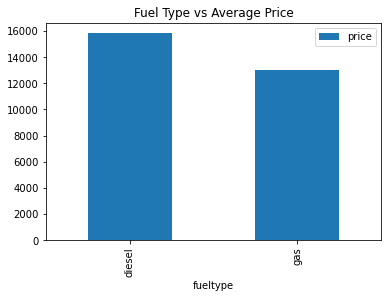

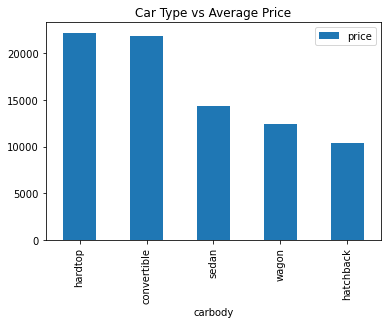

In [20]:
df = pd.DataFrame(Cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df=pd.DataFrame(Cars.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(Cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

1.Jaguar and Buick seem to have highest average price.

2.diesel has higher average price than gas.

3.hardtop and convertible have higher average price.

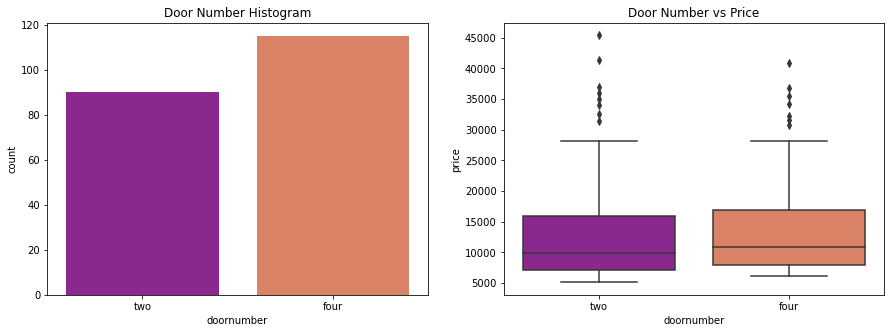

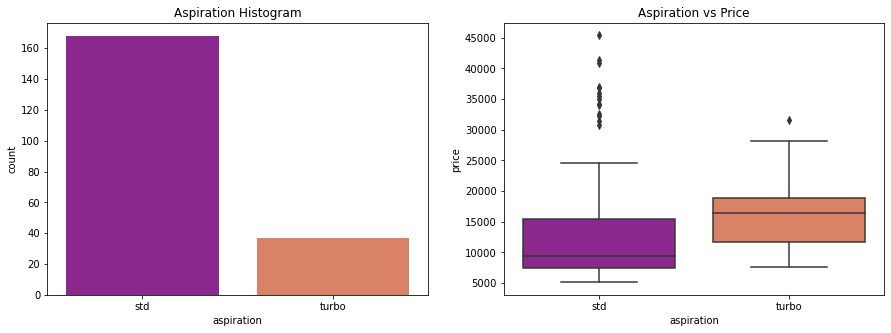

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(Cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=Cars.doornumber, y=Cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(Cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=Cars.aspiration, y=Cars.price, palette=("plasma"))

plt.show()

1.doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

2.It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

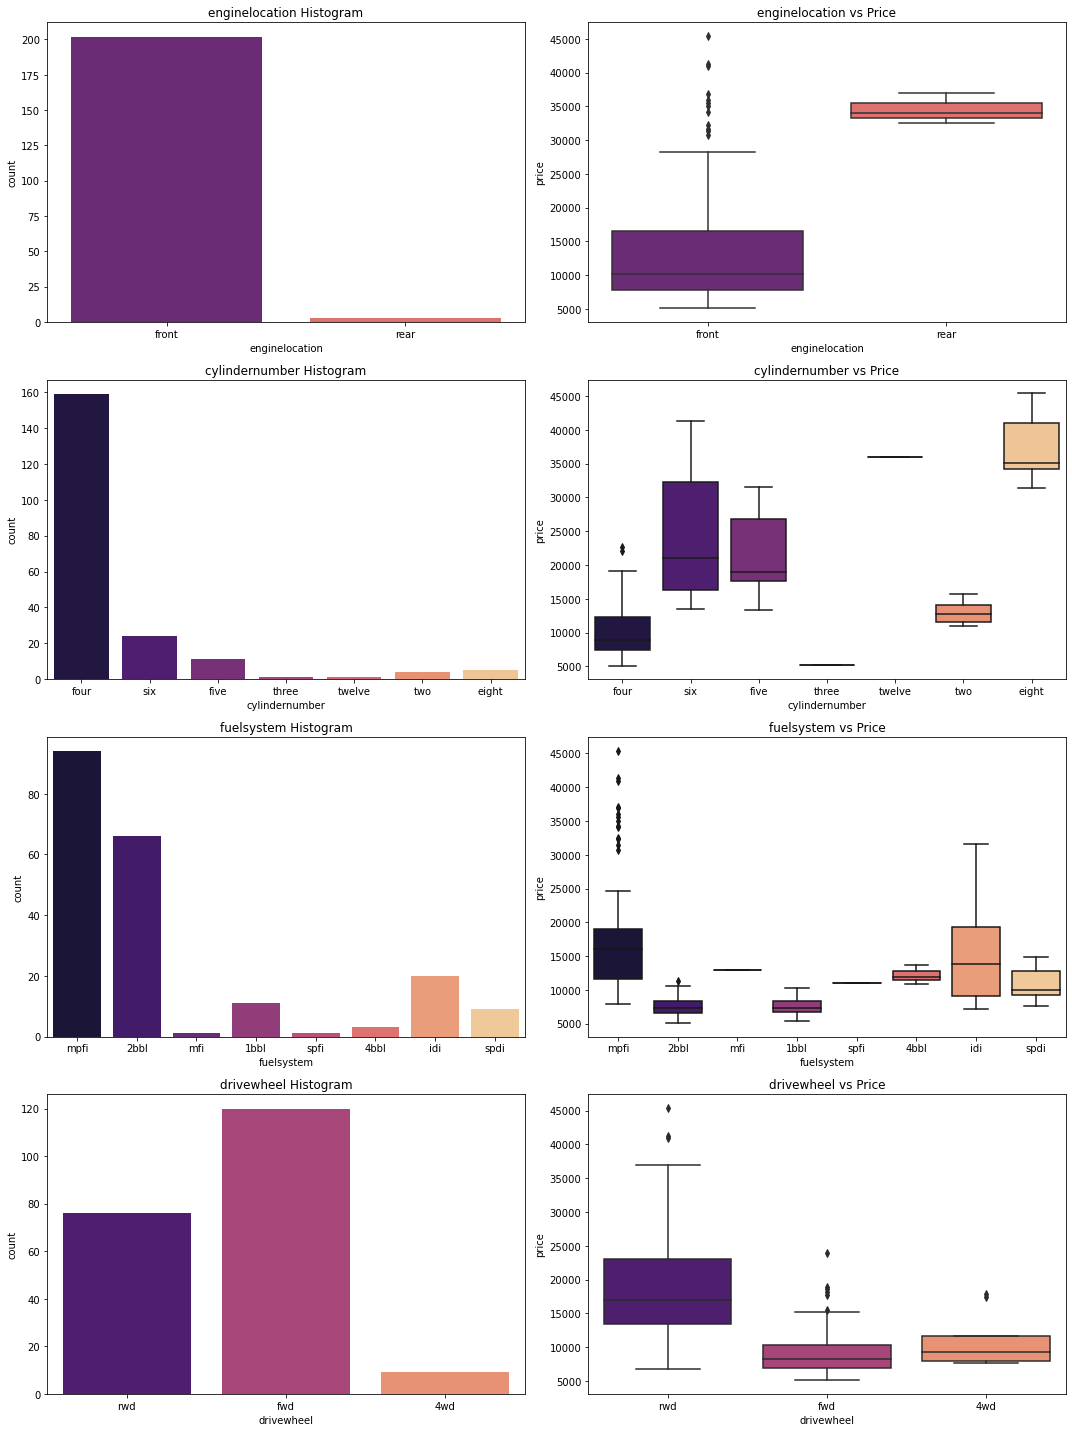

In [22]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(Cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=Cars[x], y=Cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

1.Very few datapoints for enginelocation categories to make an inference.

2.Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

3.mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference

4.A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

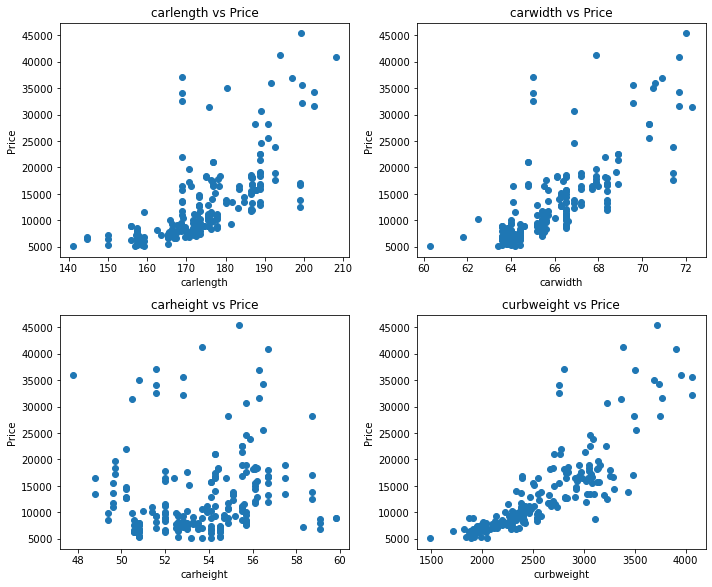

In [23]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(Cars[x],Cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


1.carwidth, carlength and curbweight seems to have a poitive correlation with price.

2.carheight doesn't show any significant trend with price.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


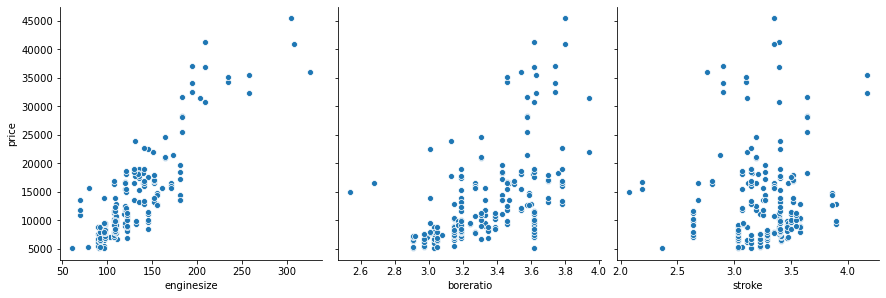

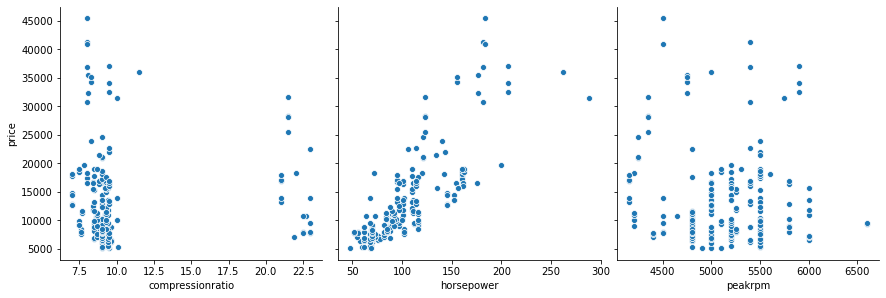

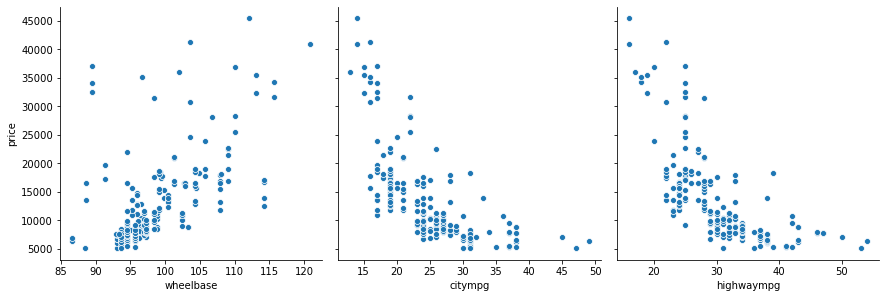

In [24]:
def pp(x,y,z):
    sns.pairplot(Cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')
plt.show()

1.enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

2.citympg, highwaympg - seem to have a significant negative correlation with price.

In [25]:
#Fuel economy
Cars['fueleconomy'] = (0.55 * Cars['citympg']) + (0.45 * Cars['highwaympg'])

In [26]:
#Binning the Car Companies based on avg prices of each Company.
Cars['price'] = Cars['price'].astype('int')
temp = Cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
Cars_bin=['Budget','Medium','Highend']
Cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=Cars_bin)
Cars.head()


car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
0        rwd          front       88.6  ...       3.47    2.68   
1        rwd          front       88.6  ...       3.47    2.68   
2        rwd          front       94.5  ...       2.68    3.47   
3        fwd          front       99.8  ...       3.19    3.40   
4        4wd          front       99.4  ...       3.19    3.40   

   compressionratio  horsepower peakrpm citympg  highwaympg  price  \
0               9.0         111    5000      21          27  13495   
1               9.0         111    5000      21          27  16500   
2               9.0         154    5000      19          26  16500   
3              10.0         102    5500      24          30  13950   
4               8.0         115    5500      18          22  17450   

   fueleconomy  carsrange  
0        23.70     Medium  
1        23.70     Medium  
2        22.15     Medium  
3        26.70     Medium  
4        19.80     Medium  

[5 rows x 28 columns]


# Step 5 : Bivariate Analysis

Text(0, 0.5, 'Price')

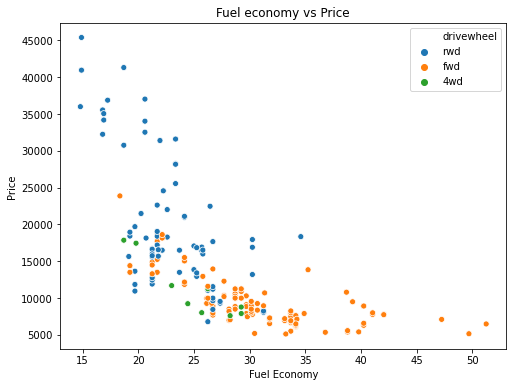

In [27]:
plt.figure(figsize=(8,6))
plt.title('Fuel economy vs Price')
sns.scatterplot(x=Cars['fueleconomy'],y=Cars['price'],hue=Cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')


fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 1800x432 with 0 Axes>

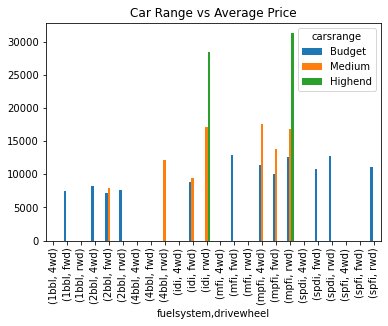

In [28]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(Cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

List of significant variables after Visual analysis :

- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [29]:
cars_lr = Cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()


price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  fueleconomy  \
0       dohc           four         130       3.47         111        23.70   
1       dohc           four         130       3.47         111        23.70   
2       ohcv            six         152       2.68         154        22.15   
3        ohc           four         109       3.19         102        26.70   
4        ohc           five         136       3.19         115        19.80   

   carlength  carwidth carsrange  
0      168.8      64.1    Medium  
1      168.8      64.1    Medium  
2      171.2      65.5    Medium  
3      176.6      66.2    Medium  
4      176.6      66.4    Medium

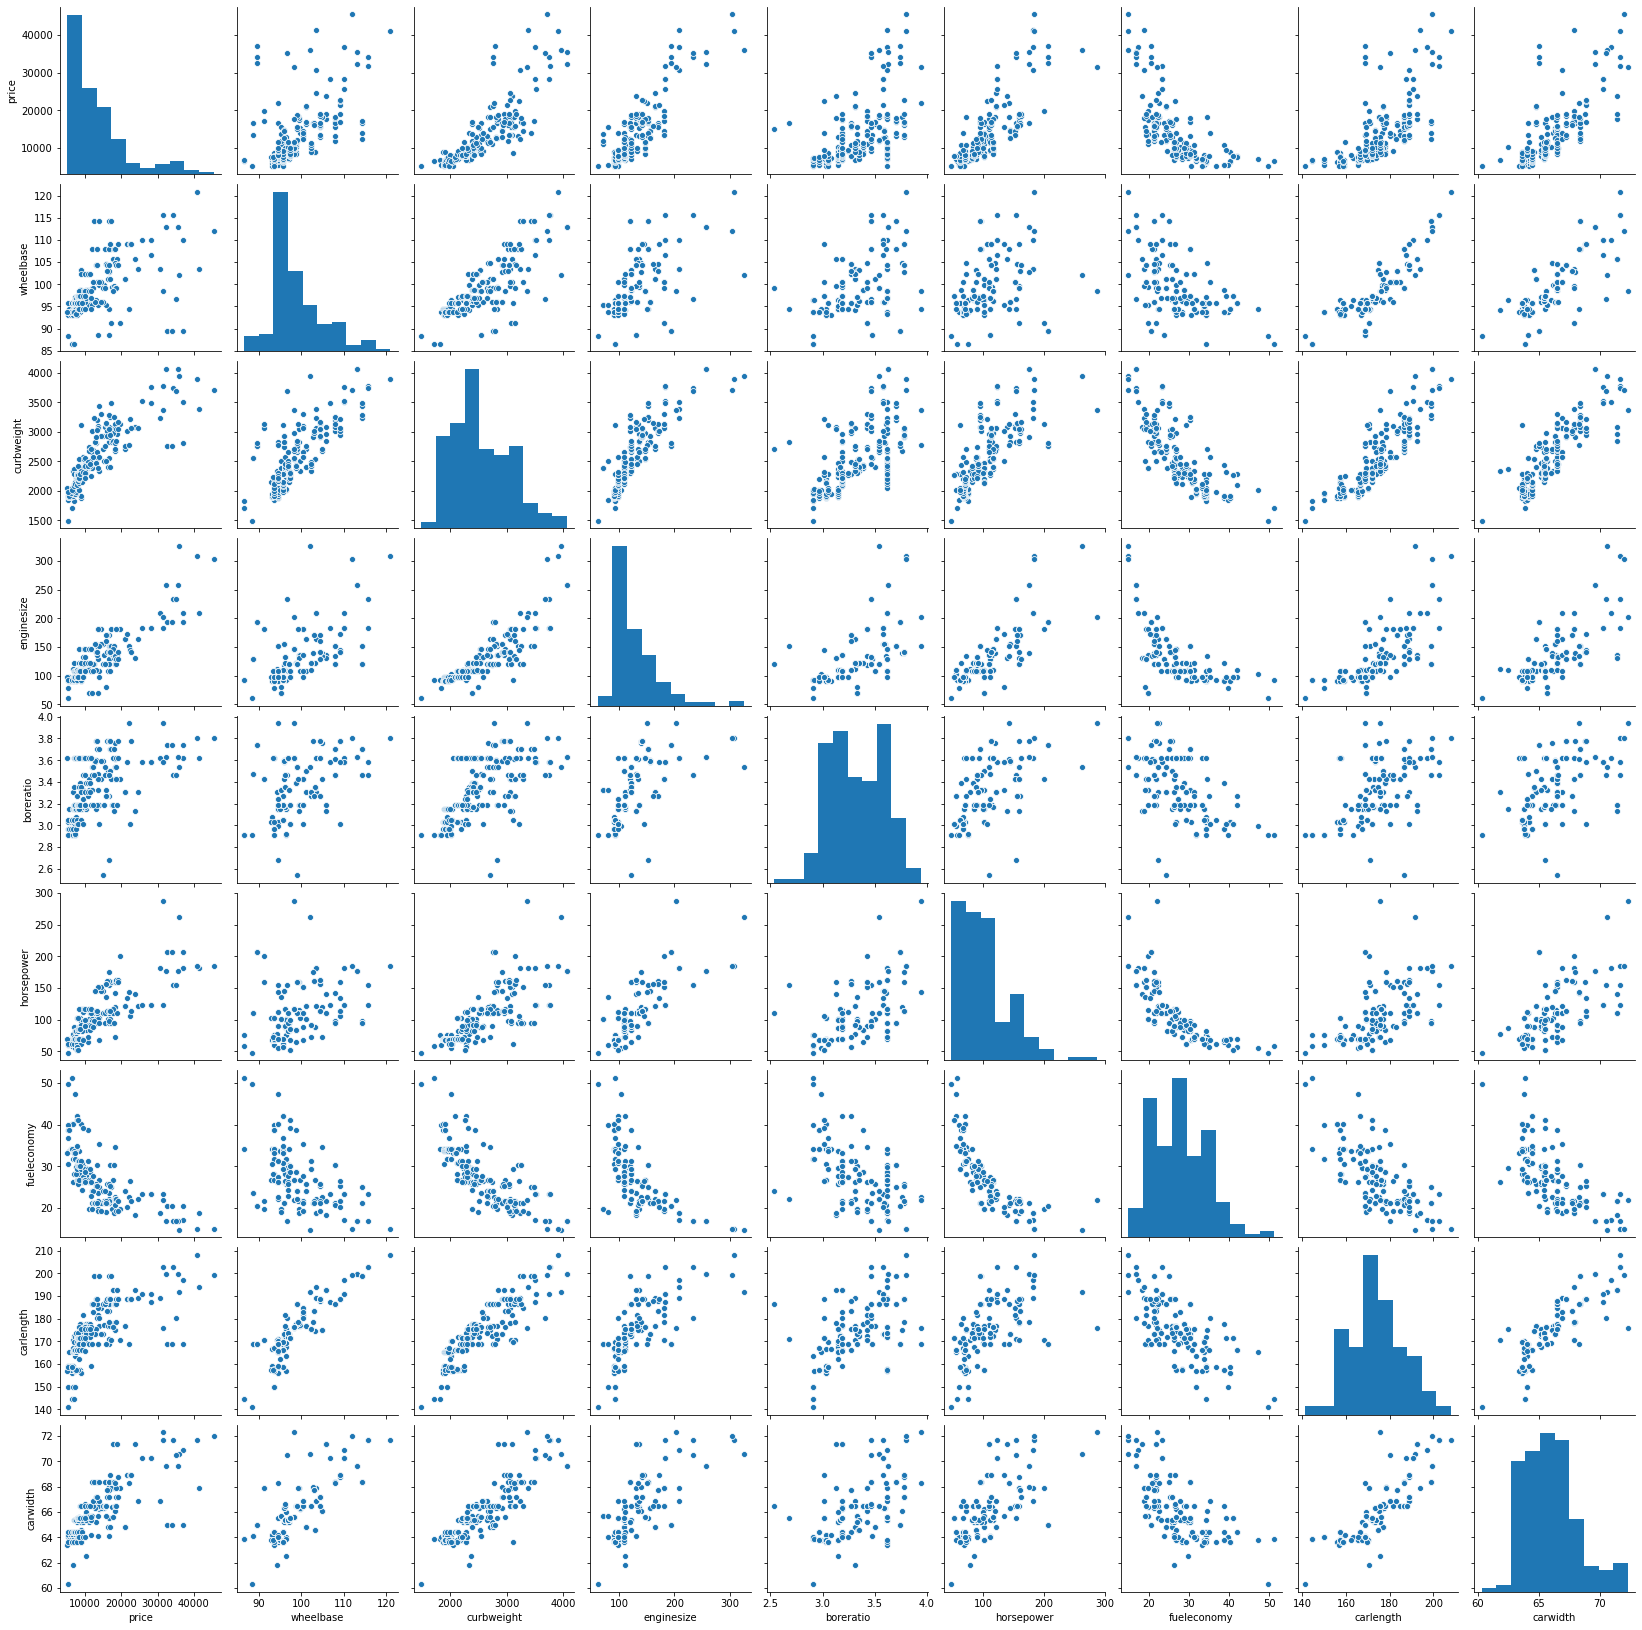

In [30]:
sns.pairplot(cars_lr)
plt.show()

# Step 6 : Dummy Variables

In [31]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [32]:
cars_lr.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  13495       88.6        2548         130       3.47         111   
1  16500       88.6        2548         130       3.47         111   
2  16500       94.5        2823         152       2.68         154   
3  13950       99.8        2337         109       3.19         102   
4  17450       99.4        2824         136       3.19         115   

   fueleconomy  carlength  carwidth  gas  ...  ohcv  rotor  five  four  six  \
0        23.70      168.8      64.1    1  ...     0      0     0     1    0   
1        23.70      168.8      64.1    1  ...     0      0     0     1    0   
2        22.15      171.2      65.5    1  ...     1      0     0     0    1   
3        26.70      176.6      66.2    1  ...     0      0     0     1    0   
4        19.80      176.6      66.4    1  ...     0      0     1     0    0   

   three  twelve  two  Medium  Highend  
0      0       0    0       1        0  
1      0       0    0       1        0  
2      0       0    0       1        0  
3      0       0    0       1        0  
4      0       0    0       1        0  

[5 rows x 31 columns]

In [33]:
cars_lr.shape

(205, 31)

# Step 7 : Train-Test Split and feature scaling


In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-35-65c637f22cca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122  0.068818   0.244828    0.272692    0.139623   0.230159    0.083333   
125  0.466890   0.272414    0.500388    0.339623   1.000000    0.395833   
166  0.122110   0.272414    0.314973    0.139623   0.444444    0.266667   
1    0.314446   0.068966    0.411171    0.260377   0.626984    0.262500   
199  0.382131   0.610345    0.647401    0.260377   0.746032    0.475000   

     fueleconomy  carlength  carwidth  gas  ...  ohcv  rotor  five  four  six  \
122     0.530864   0.426016  0.291667    1  ...     0      0     0     1    0   
125     0.213992   0.452033  0.666667    1  ...     0      0     0     1    0   
166     0.344307   0.448780  0.308333    1  ...     0      0     0     1    0   
1       0.244170   0.450407  0.316667    1  ...     0      0     0     1    0   
199     0.122085   0.775610  0.575000    1  ...     0      0     0     1    0   

     three  twelve  two  Medium  Highend  
122      0       0    0       0        0  
125      0       0    0       0        1  
166      0       0    0       0        0  
1        0       0    0       1        0  
199      0       0    0       1        0  

[5 rows x 31 columns]

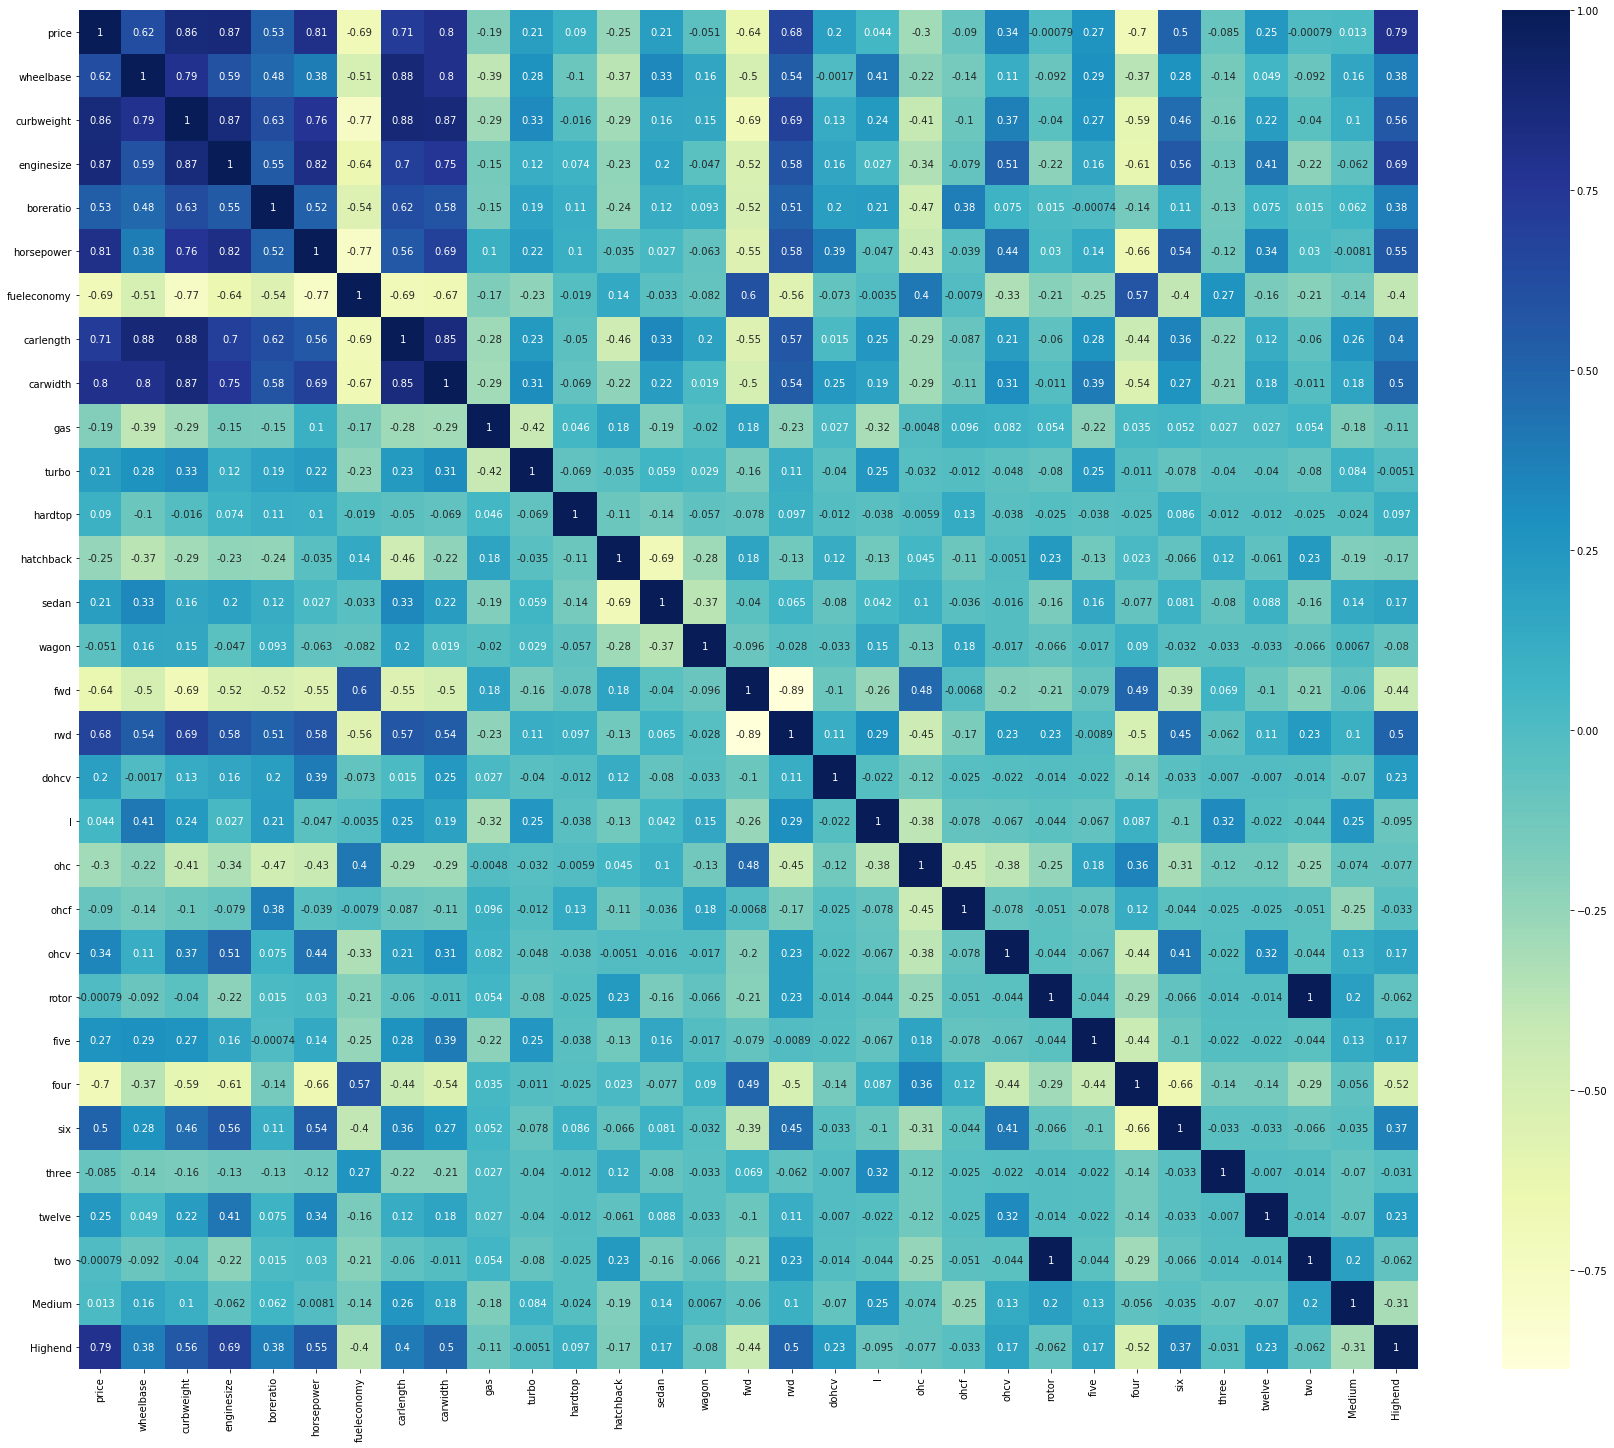

In [37]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [38]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [41]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [42]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

curbweight  horsepower  fueleconomy  carwidth  hatchback  sedan  wagon  \
122    0.272692    0.083333     0.530864  0.291667          0      1      0   
125    0.500388    0.395833     0.213992  0.666667          1      0      0   
166    0.314973    0.266667     0.344307  0.308333          1      0      0   
1      0.411171    0.262500     0.244170  0.316667          0      0      0   
199    0.647401    0.475000     0.122085  0.575000          0      0      1   

     dohcv  twelve  Highend  
122      0       0        0  
125      0       0        1  
166      0       0        0  
1        0       0        0  
199      0       0        0

In [46]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# MODEL 1

In [47]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.29e-70
Time:                        12:00:09   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

p-vale of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [48]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

# Model:2

In [49]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           4.25e-71
Time:                        12:01:34   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

# Model:3

In [51]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

In [52]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           7.85e-72
Time:                        12:03:35   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [53]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features    VIF
0       const  26.90
1  curbweight   8.10
5       sedan   6.07
4   hatchback   5.63
3    carwidth   5.14
2  horsepower   3.61
6       wagon   3.58
8     Highend   1.63
7       dohcv   1.46

dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

# Model:4

In [54]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           4.70e-70
Time:                        12:07:17   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [56]:
checkVIF(X_train_new)

Features    VIF
0       const  26.89
4       sedan   6.06
3   hatchback   5.54
5       wagon   3.47
1  horsepower   2.50
2    carwidth   2.22
7     Highend   1.56
6       dohcv   1.21

dropping sedan because of high VIF value.

In [57]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

# Model:5

In [59]:
X_train_new = build_model(X_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.68e-69
Time:                        12:09:37   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [60]:
checkVIF(X_train_new)

Features    VIF
0       const  10.82
1  horsepower   2.39
2    carwidth   2.09
6     Highend   1.55
3   hatchback   1.23
5       dohcv   1.21
4       wagon   1.11

dropping wagon because of high p-value.

In [62]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

# Model:6

In [63]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.57e-70
Time:                        12:12:08   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [64]:
checkVIF(X_train_new)

Features    VIF
0       const  10.39
1  horsepower   2.39
2    carwidth   2.08
5     Highend   1.53
4       dohcv   1.21
3   hatchback   1.13